# Assignment 2: 
### Set up the work for data-driven inference based on CitiBike data

1. States the question you want to ask, and formulates the Null and Alternative hypothesis

__________

## Q:

Is the percentage of women rides at midnight from total women rides significantly lower than men's midnight rides percentage?

## Null Hypothesis

The percentage of women rides at midnight from total women rides is similar to or greater than men's rides percentage from total men's rides at the same hour?

$H_0$ : $\frac{W{\mathrm{midnight}}}{W{\mathrm{rides}}} => \frac{M{\mathrm{midnight}}}{M{\mathrm{rides}}}$

## Alternative Hypothesis

The percentage of women rides at midnight from total women rides is significantly smaller than men's rides percentage from total men's rides at the same hour?
_significance level_ $\alpha = 0.05$

$H_1$ : $\frac{W{\mathrm{midnight}}}{W{\mathrm{rides}}} < \frac{M{\mathrm{midnight}}}{M{\mathrm{rides}}}$

________

Use pandas to read in the CitiBike files, either from the DF, or locally, but you must be able to download them on the spot (so the TA can reproduce your work). 

In [93]:
from __future__ import print_function

import numpy as np
import pylab as pl
import pandas as pd
import os

import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
df = pd.read_csv("/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip")

3. Display the top few rows of the DF in your notebook. This table __must be rendered__.
5. Display the reducted dataframe. This table __must be rendered__.
6. Plot your data distributions.

In [95]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [89]:
# add a column 'hour' with the hour of the start time; extracted from starttime 
# using pd.DateTimeIndex

df['date'] = pd.to_datetime(df['starttime'])

In [91]:
df['hour'] = df['date'].dt.hour

In [92]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,hour,date
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1,0,2017-06-01 00:00:02
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1,0,2017-06-01 00:00:13
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1,0,2017-06-01 00:00:20
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2,0,2017-06-01 00:00:24
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1,0,2017-06-01 00:00:33


In [74]:
# CitiBike Gender data is displayed as follows:
# Unknown gender = 0
# Male = 1
# Female = 2

# extract the columns for the analysis
# I chose not to calculate unknown gender (value = 0) in this analysis
df2 = df[['hour','gender']]

In [75]:
df2.head()

,hour,gender
0,0,1
1,0,1
2,0,1
3,0,2
4,0,1


In [76]:
w_total = df2.hour.groupby([df.gender == 2]).count()
m_total = df2.hour.groupby([df.gender == 1]).count()

w_total = w_total[True]
m_total = m_total[True]

print(w_total)
print(m_total)

401253
1131930


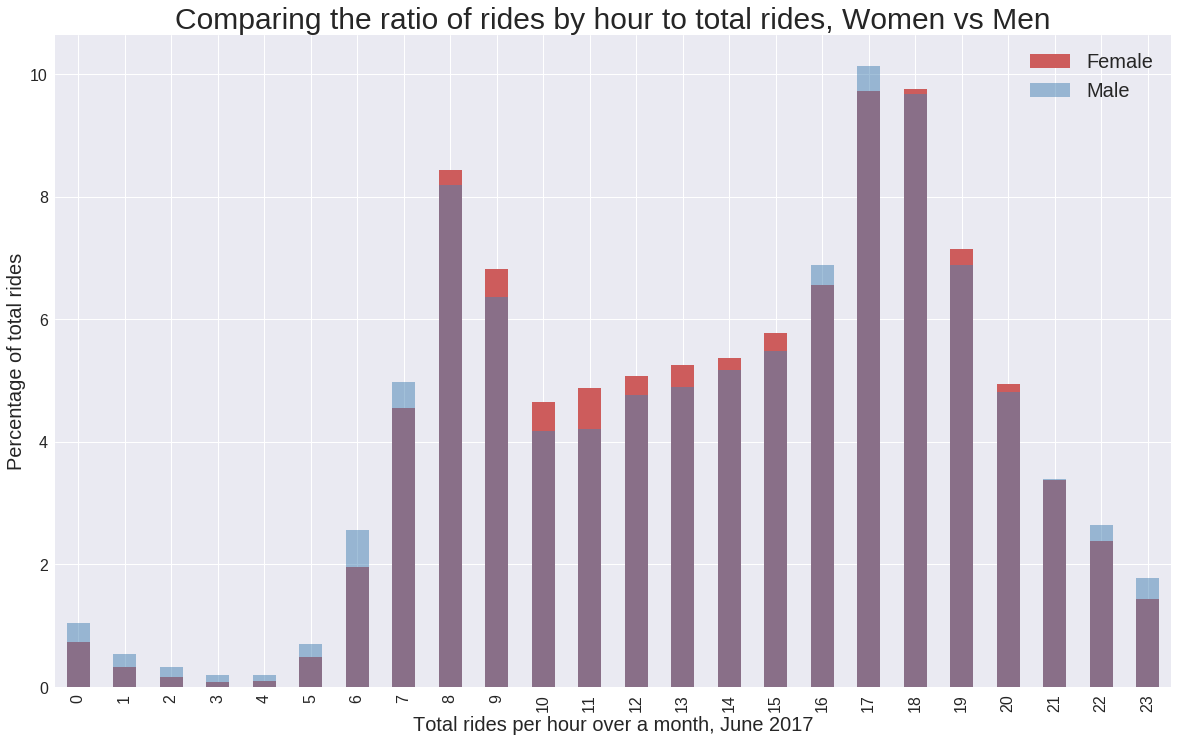

In [109]:
fig = pl.figure(figsize(20,12))

(((df2['hour'][df2['gender'] == 2].groupby([df2['hour']]).count()) / w_total)*100)\
.plot(kind="bar", color='IndianRed', label='Female')
ax = (((df2['hour'][df2['gender'] == 1].groupby([df2['hour']]).count()) / m_total)*100)\
.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Male', fontsize=16)

pl.xlabel('Total rides per hour over a month, June 2017', fontsize=20)
pl.ylabel('Percentage of total rides', fontsize=20)
pl.title('Comparing the ratio of rides by hour to total rides, Women vs Men', fontsize=30)
pl.legend(prop={'size': 20})

### Results: 
 Reviewing the above distribution, we can reject the Null Hypothesis